In [ ]:
# default_exp gbe.rtt.reliability

# Risk Taking Task - Reliability

<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
        </div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.rtt.data_provider import RTTDataProvider
import trr265.gbe.rtt.scoring as rtt_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and is_baseline")
df = df.query("is_baseline==True")


## Test-retest reliability

### Based on percentage gambles

#### Win

R[write to console]: Lade nötiges Paket: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.645,4.642,380.0,381.0,0.0,0.594,0.692,".65 (.59, .69)"
Single_random_raters,ICC2,0.646,4.683,380.0,380.0,0.0,0.594,0.693,".65 (.59, .69)"
Single_fixed_raters,ICC3,0.648,4.683,380.0,380.0,0.0,0.596,0.694,".65 (.60, .69)"
Average_raters_absolute,ICC1k,0.785,4.642,380.0,381.0,0.0,0.745,0.818,".78 (.74, .82)"
Average_random_raters,ICC2k,0.785,4.683,380.0,380.0,0.0,0.745,0.818,".78 (.75, .82)"
Average_fixed_raters,ICC3k,0.786,4.683,380.0,380.0,0.0,0.747,0.820,".79 (.75, .82)"


,variance,Percent
ID,0.067,0.646
Items,0.000,0.003
Residual,0.036,0.351
Total,0.104,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


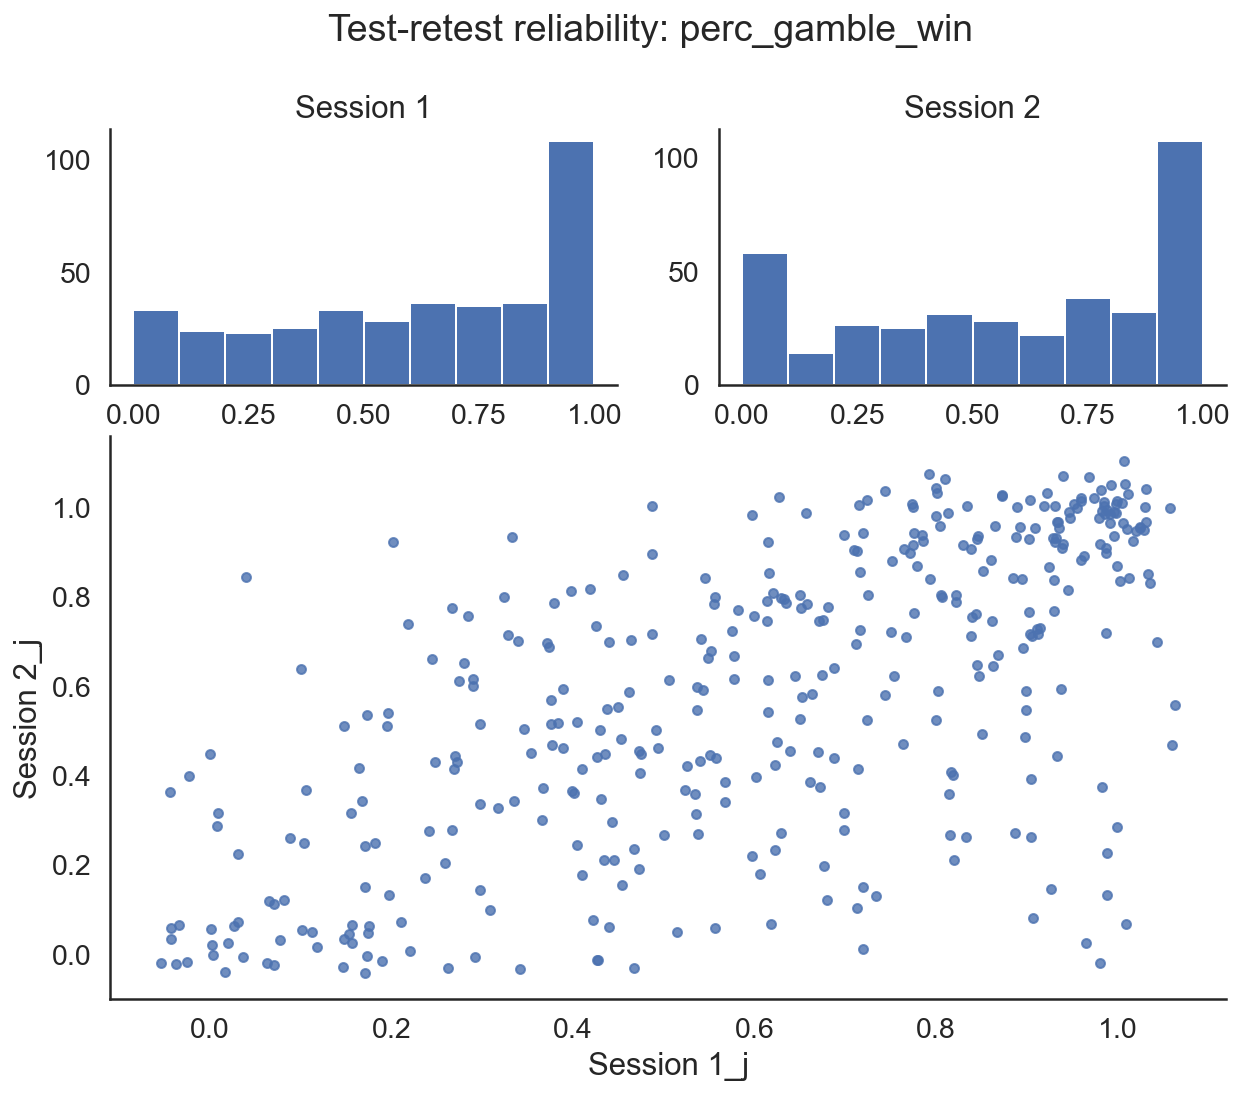

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.543,3.376,380.0,381.0,0.0,0.481,0.600,".54 (.48, .60)"
Single_random_raters,ICC2,0.553,3.734,380.0,380.0,0.0,0.466,0.625,".55 (.47, .62)"
Single_fixed_raters,ICC3,0.578,3.734,380.0,380.0,0.0,0.518,0.631,".58 (.52, .63)"
Average_raters_absolute,ICC1k,0.704,3.376,380.0,381.0,0.0,0.649,0.750,".70 (.65, .75)"
Average_random_raters,ICC2k,0.712,3.734,380.0,380.0,0.0,0.636,0.769,".71 (.64, .77)"
Average_fixed_raters,ICC3k,0.732,3.734,380.0,380.0,0.0,0.683,0.774,".73 (.68, .77)"


,variance,Percent
ID,0.048,0.553
Items,0.004,0.043
Residual,0.035,0.404
Total,0.087,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


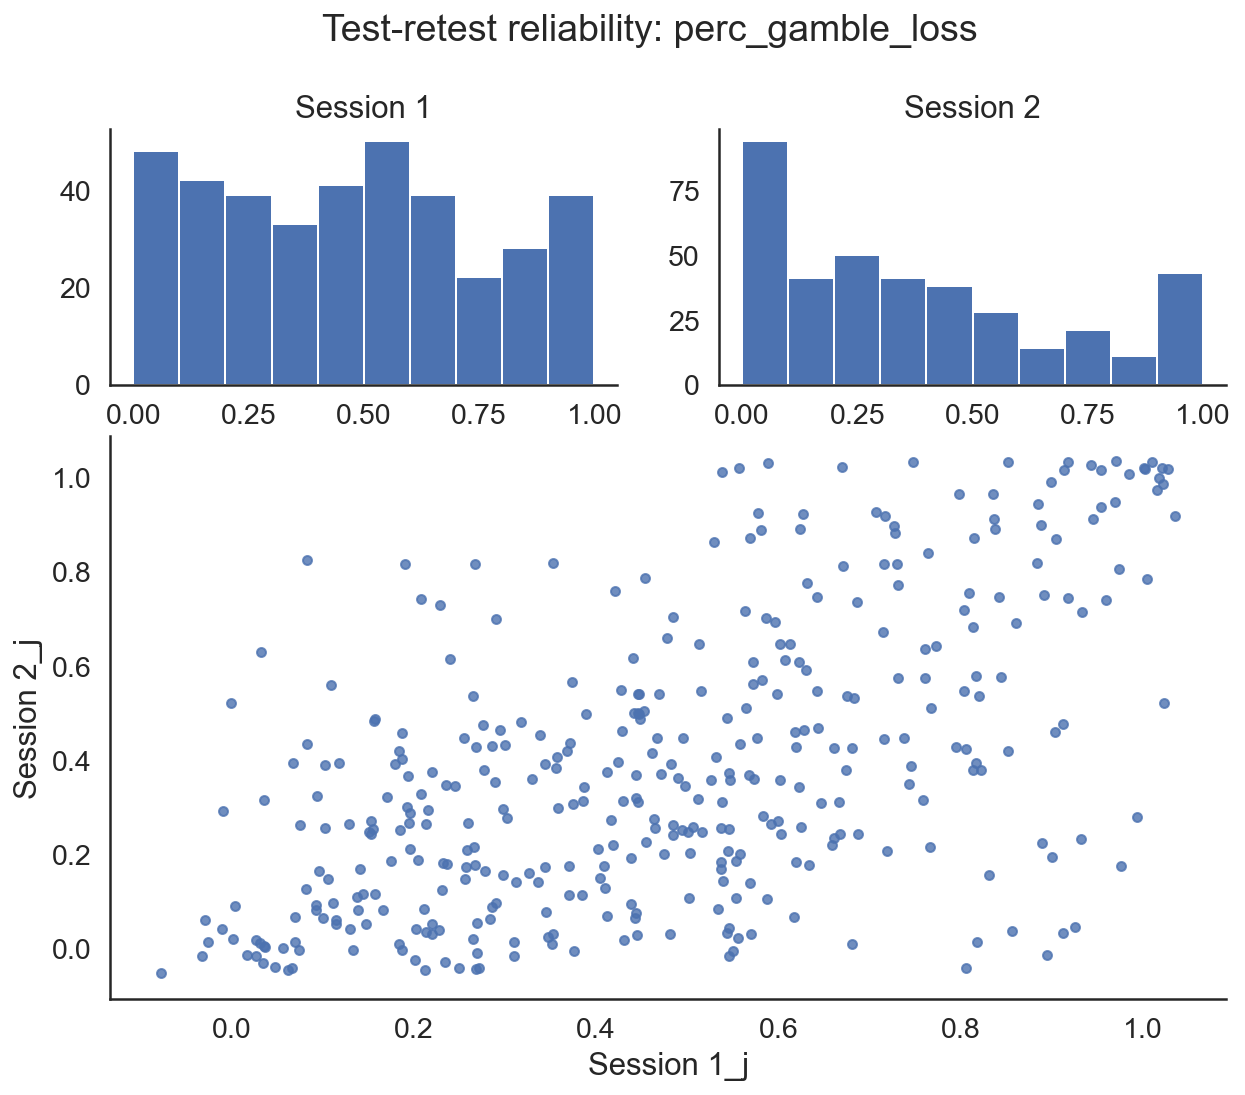

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.493,2.944,380.0,381.0,0.0,0.426,0.554,".49 (.43, .55)"
Single_random_raters,ICC2,0.500,3.122,380.0,380.0,0.0,0.426,0.566,".50 (.43, .57)"
Single_fixed_raters,ICC3,0.515,3.122,380.0,380.0,0.0,0.450,0.574,".51 (.45, .57)"
Average_raters_absolute,ICC1k,0.660,2.944,380.0,381.0,0.0,0.598,0.713,".66 (.60, .71)"
Average_random_raters,ICC2k,0.667,3.122,380.0,380.0,0.0,0.598,0.723,".67 (.60, .72)"
Average_fixed_raters,ICC3k,0.680,3.122,380.0,380.0,0.0,0.621,0.729,".68 (.62, .73)"


,variance,Percent
ID,0.043,0.500
Items,0.002,0.029
Residual,0.041,0.471
Total,0.086,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


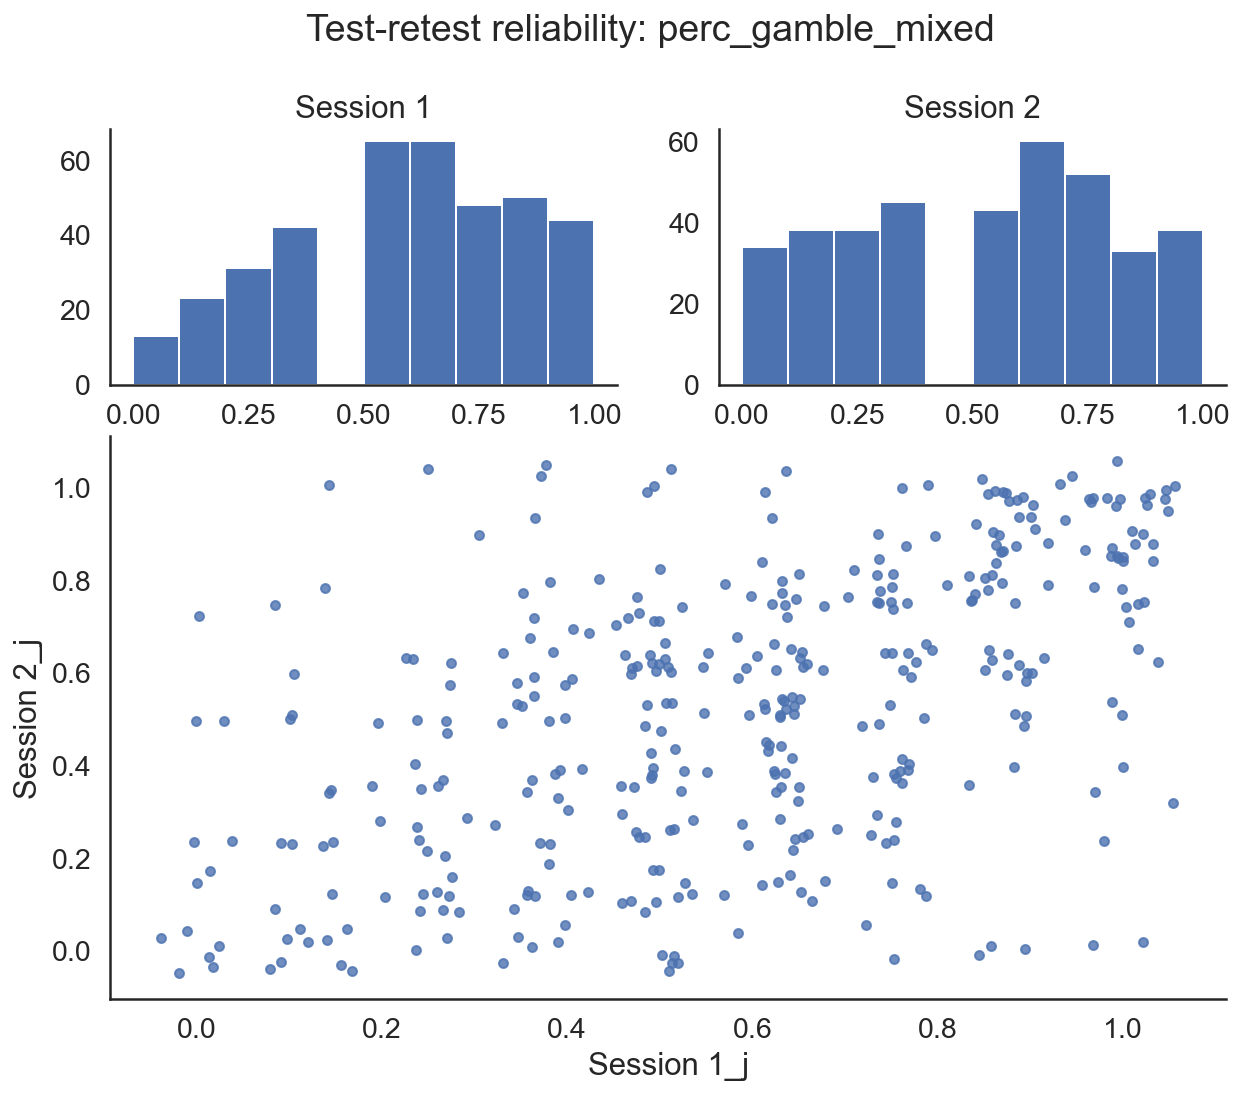

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_mixed', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_sep`).

#### Win

In [ ]:
_df = rtt_scoring.get_perc_gamble_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.639,4.544,380.0,381.0,0.0,0.587,0.687,".64 (.59, .69)"
Single_random_raters,ICC2,0.640,4.600,380.0,380.0,0.0,0.587,0.687,".64 (.59, .69)"
Single_fixed_raters,ICC3,0.643,4.600,380.0,380.0,0.0,0.591,0.690,".64 (.59, .69)"
Average_raters_absolute,ICC1k,0.780,4.544,380.0,381.0,0.0,0.739,0.814,".78 (.74, .81)"
Average_random_raters,ICC2k,0.781,4.600,380.0,380.0,0.0,0.740,0.815,".78 (.74, .81)"
Average_fixed_raters,ICC3k,0.783,4.600,380.0,380.0,0.0,0.743,0.816,".78 (.74, .82)"


,variance,Percent
ID,0.051,0.640
Items,0.000,0.004
Residual,0.029,0.356
Total,0.080,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


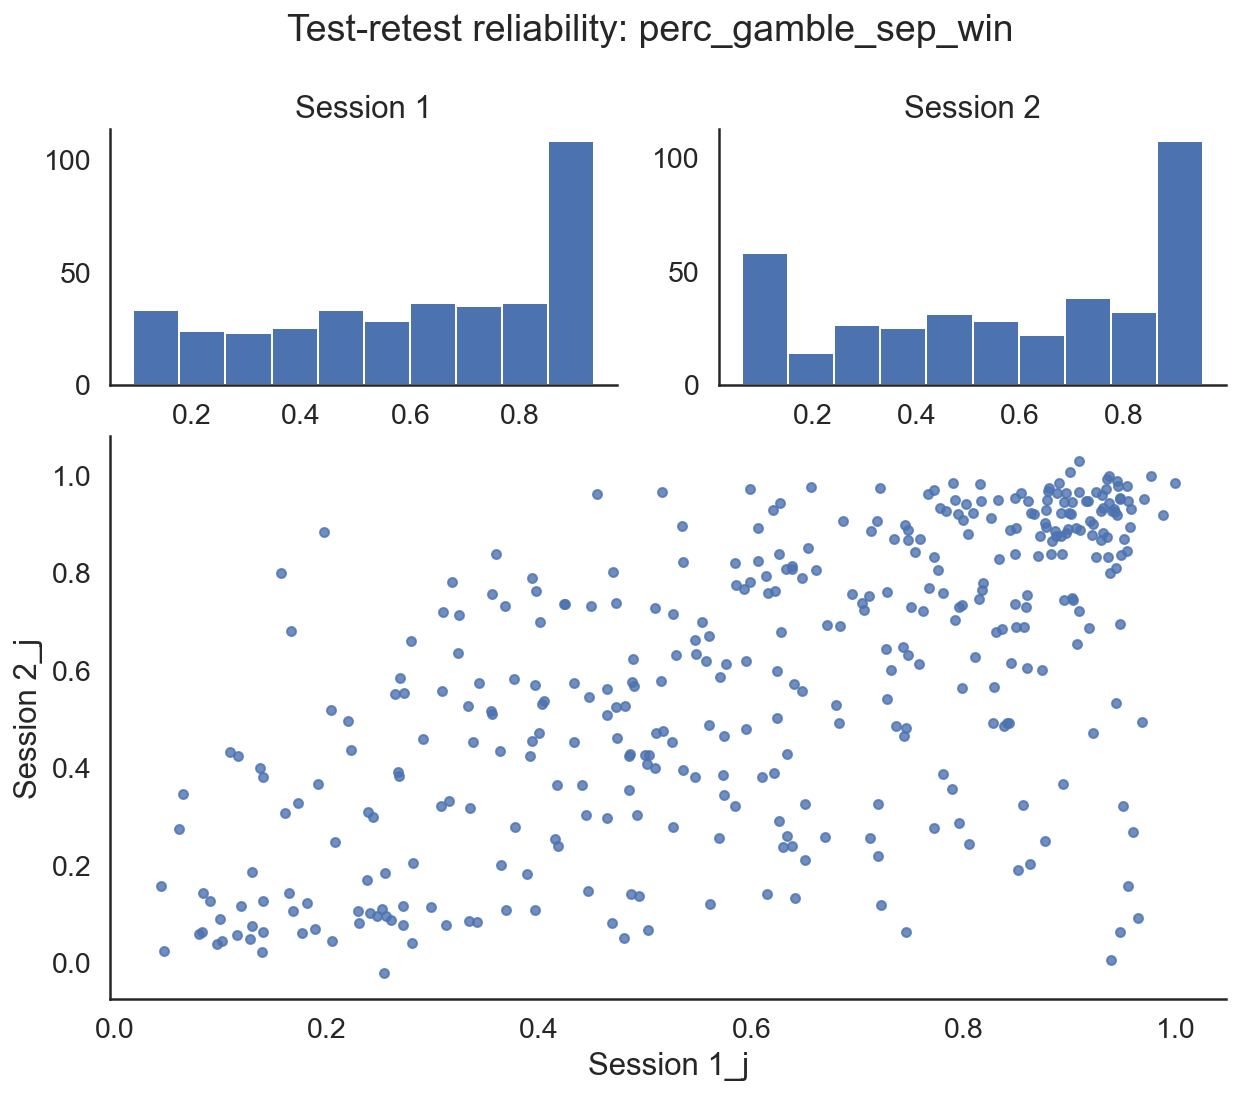

In [ ]:
iccs_trial_sep_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.514,3.114,380.0,381.0,0.0,0.449,0.573,".51 (.45, .57)"
Single_random_raters,ICC2,0.530,3.634,380.0,380.0,0.0,0.416,0.619,".53 (.42, .62)"
Single_fixed_raters,ICC3,0.568,3.634,380.0,380.0,0.0,0.508,0.623,".57 (.51, .62)"
Average_raters_absolute,ICC1k,0.679,3.114,380.0,381.0,0.0,0.620,0.729,".68 (.62, .73)"
Average_random_raters,ICC2k,0.693,3.634,380.0,380.0,0.0,0.588,0.765,".69 (.59, .76)"
Average_fixed_raters,ICC3k,0.725,3.634,380.0,380.0,0.0,0.674,0.768,".72 (.67, .77)"


,variance,Percent
ID,0.031,0.530
Items,0.004,0.067
Residual,0.024,0.403
Total,0.059,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


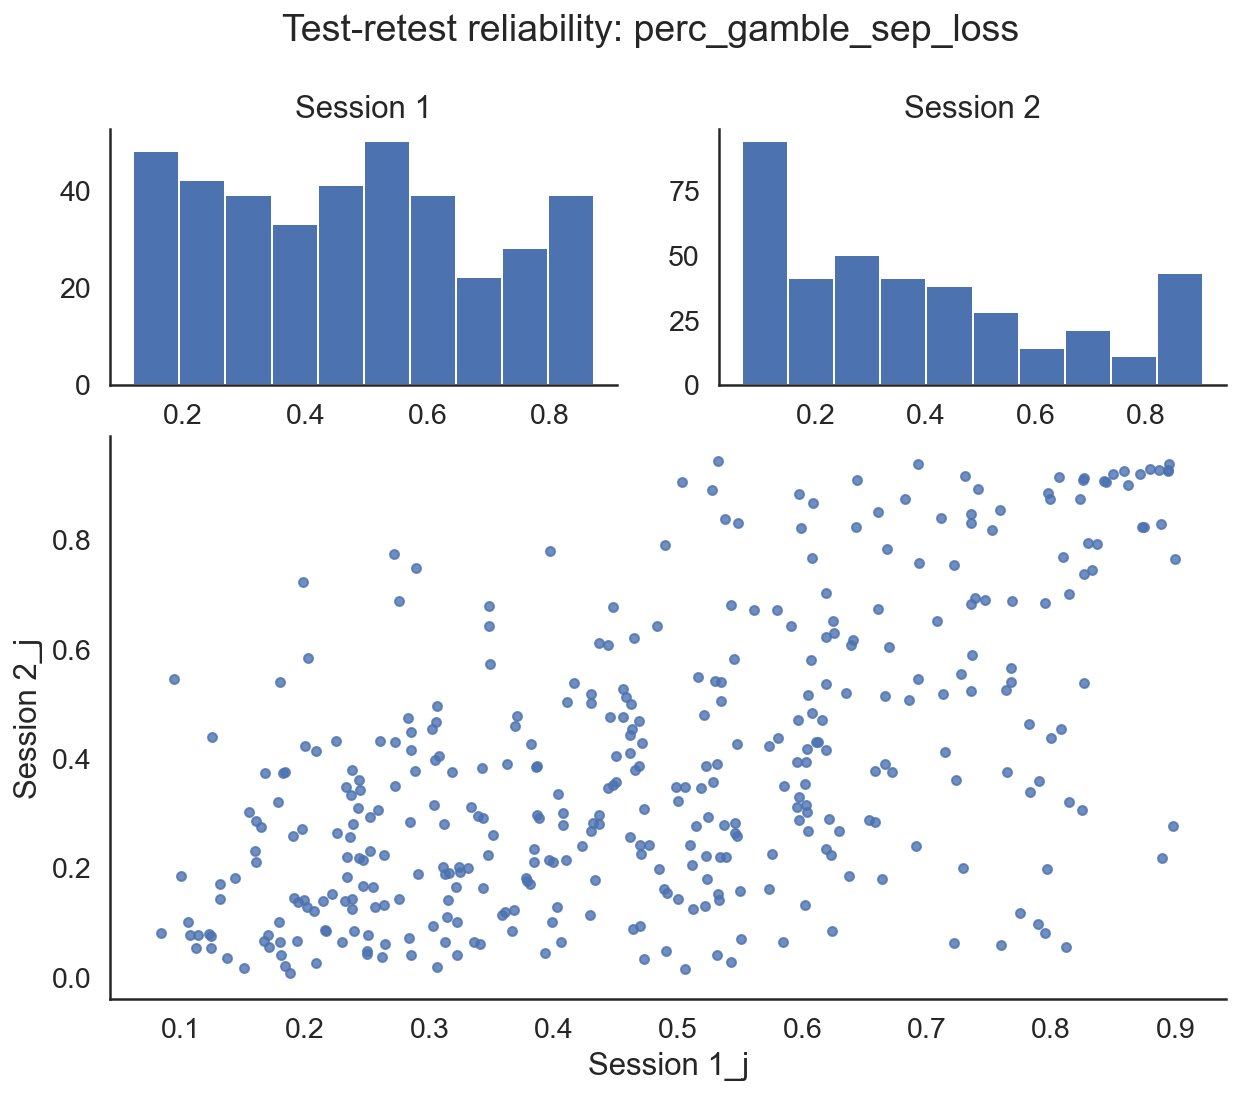

In [ ]:
iccs_trial_sep_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.457,2.686,380.0,381.0,0.0,0.388,0.521,".46 (.39, .52)"
Single_random_raters,ICC2,0.472,3.000,380.0,380.0,0.0,0.378,0.553,".47 (.38, .55)"
Single_fixed_raters,ICC3,0.500,3.000,380.0,380.0,0.0,0.434,0.561,".50 (.43, .56)"
Average_raters_absolute,ICC1k,0.628,2.686,380.0,381.0,0.0,0.559,0.685,".63 (.56, .69)"
Average_random_raters,ICC2k,0.642,3.000,380.0,380.0,0.0,0.549,0.712,".64 (.55, .71)"
Average_fixed_raters,ICC3k,0.667,3.000,380.0,380.0,0.0,0.605,0.718,".67 (.61, .72)"


,variance,Percent
ID,0.022,0.472
Items,0.003,0.055
Residual,0.022,0.472
Total,0.047,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


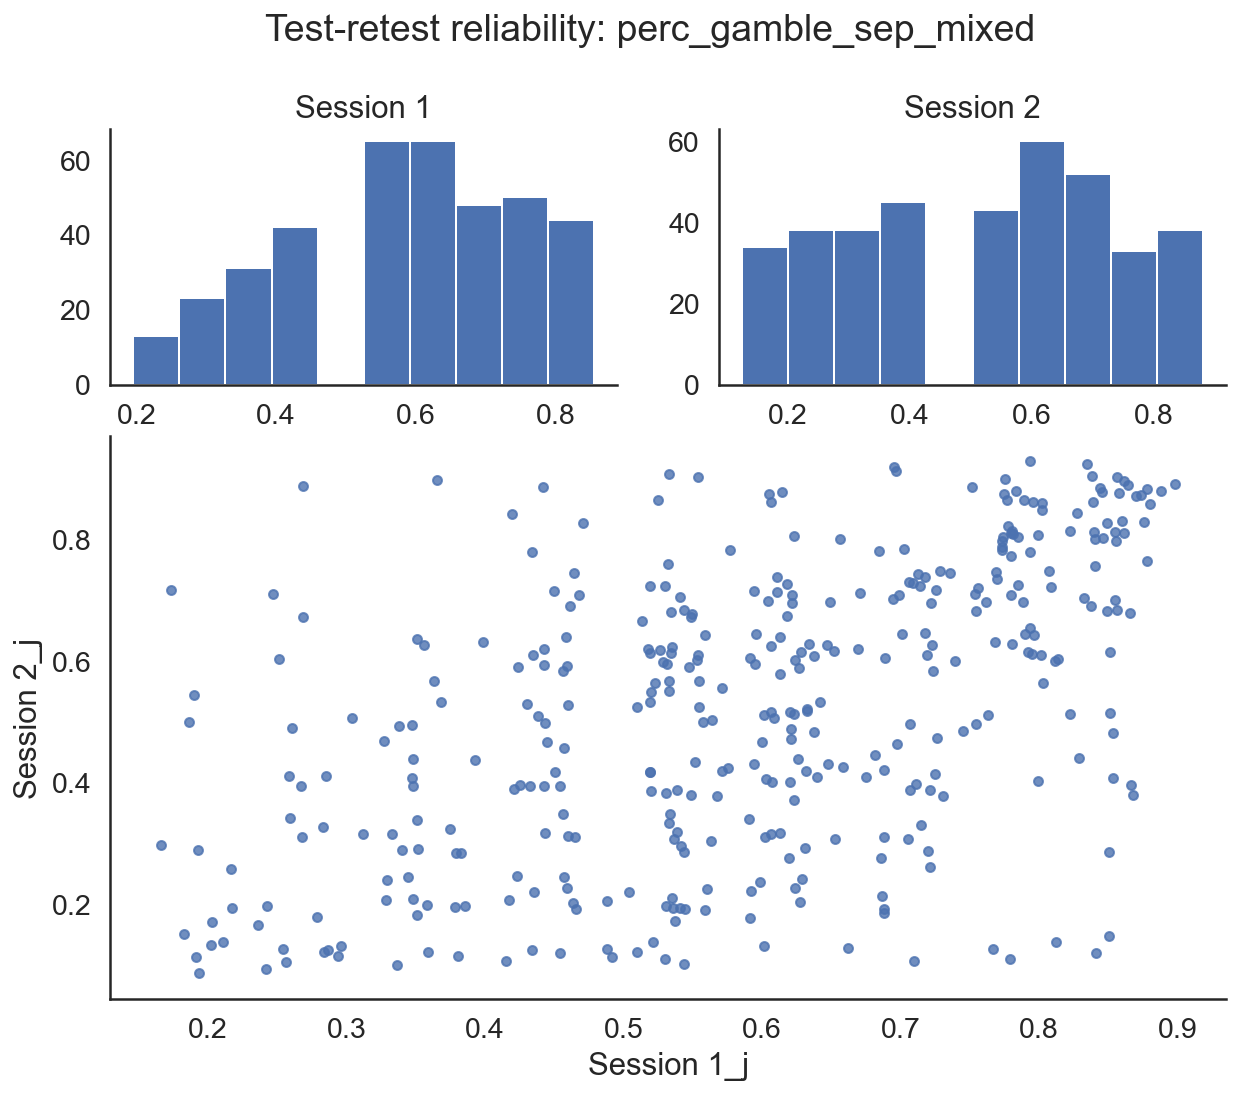

In [ ]:
iccs_trial_sep_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_mixed', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_joint`).

#### Win

In [ ]:
_df, ms = rtt_scoring.get_perc_gamble_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.819,10.038,380.0,381.0,0.0,0.789,0.845,".82 (.79, .84)"
Single_random_raters,ICC2,0.819,10.137,380.0,380.0,0.0,0.789,0.845,".82 (.79, .85)"
Single_fixed_raters,ICC3,0.820,10.137,380.0,380.0,0.0,0.791,0.846,".82 (.79, .85)"
Average_raters_absolute,ICC1k,0.900,10.038,380.0,381.0,0.0,0.882,0.916,".90 (.88, .92)"
Average_random_raters,ICC2k,0.900,10.137,380.0,380.0,0.0,0.882,0.916,".90 (.88, .92)"
Average_fixed_raters,ICC3k,0.901,10.137,380.0,380.0,0.0,0.883,0.917,".90 (.88, .92)"


,variance,Percent
ID,0.066,0.819
Items,0.000,0.002
Residual,0.014,0.179
Total,0.080,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


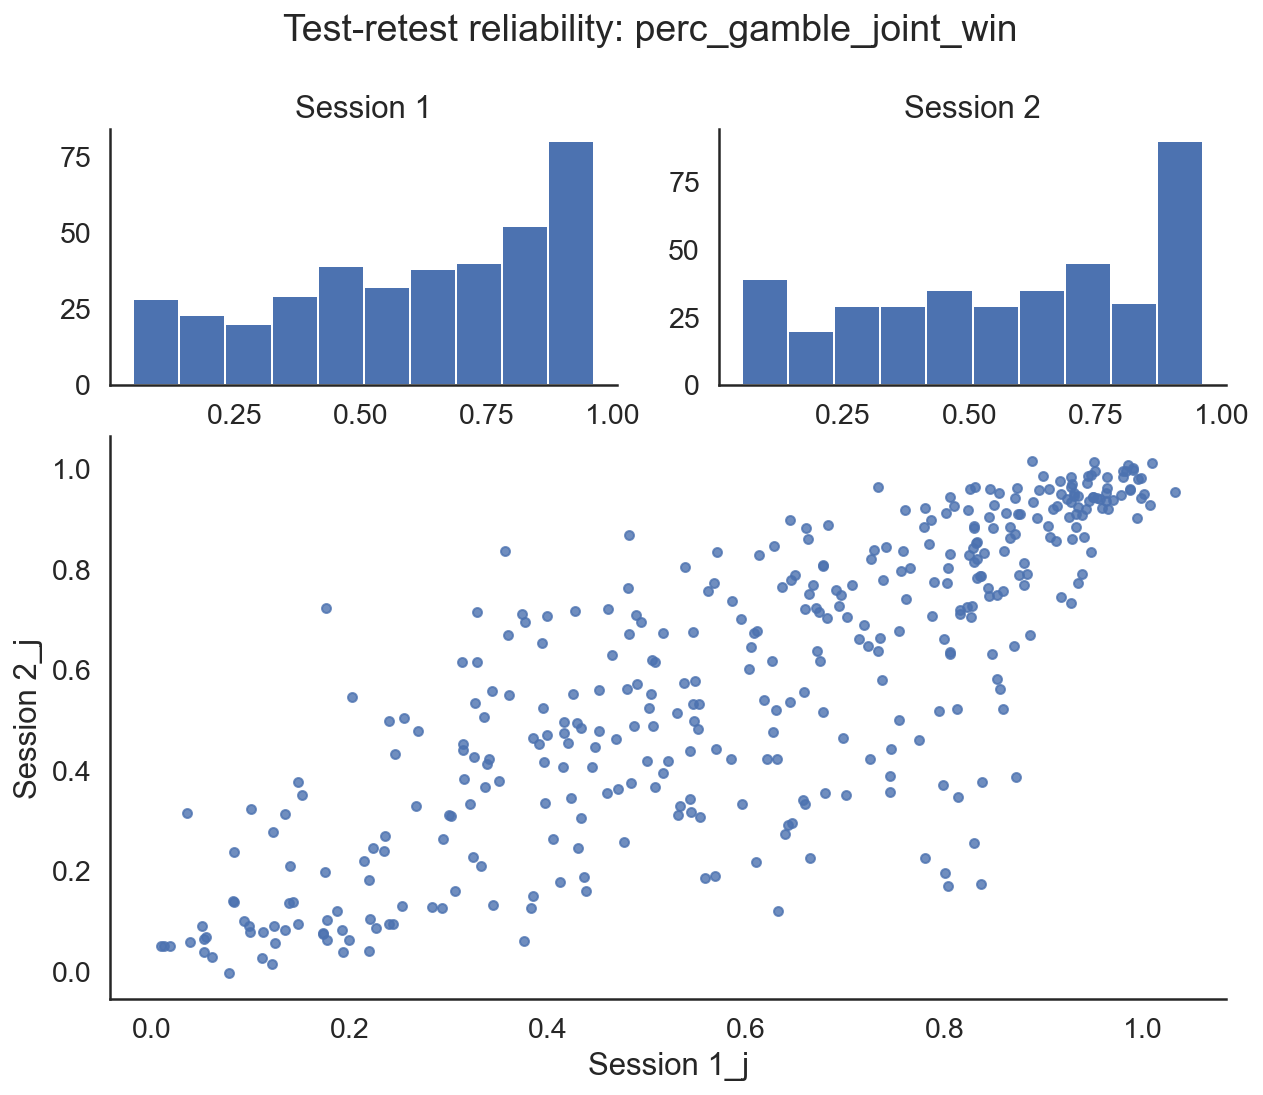

In [ ]:
iccs_trial_joint_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.768,7.634,380.0,381.0,0.0,0.731,0.801,".77 (.73, .80)"
Single_random_raters,ICC2,0.771,8.427,380.0,380.0,0.0,0.712,0.816,".77 (.71, .82)"
Single_fixed_raters,ICC3,0.788,8.427,380.0,380.0,0.0,0.754,0.818,".79 (.75, .82)"
Average_raters_absolute,ICC1k,0.869,7.634,380.0,381.0,0.0,0.845,0.889,".87 (.84, .89)"
Average_random_raters,ICC2k,0.871,8.427,380.0,380.0,0.0,0.832,0.899,".87 (.83, .90)"
Average_fixed_raters,ICC3k,0.881,8.427,380.0,380.0,0.0,0.859,0.900,".88 (.86, .90)"


,variance,Percent
ID,0.045,0.771
Items,0.001,0.022
Residual,0.012,0.208
Total,0.058,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


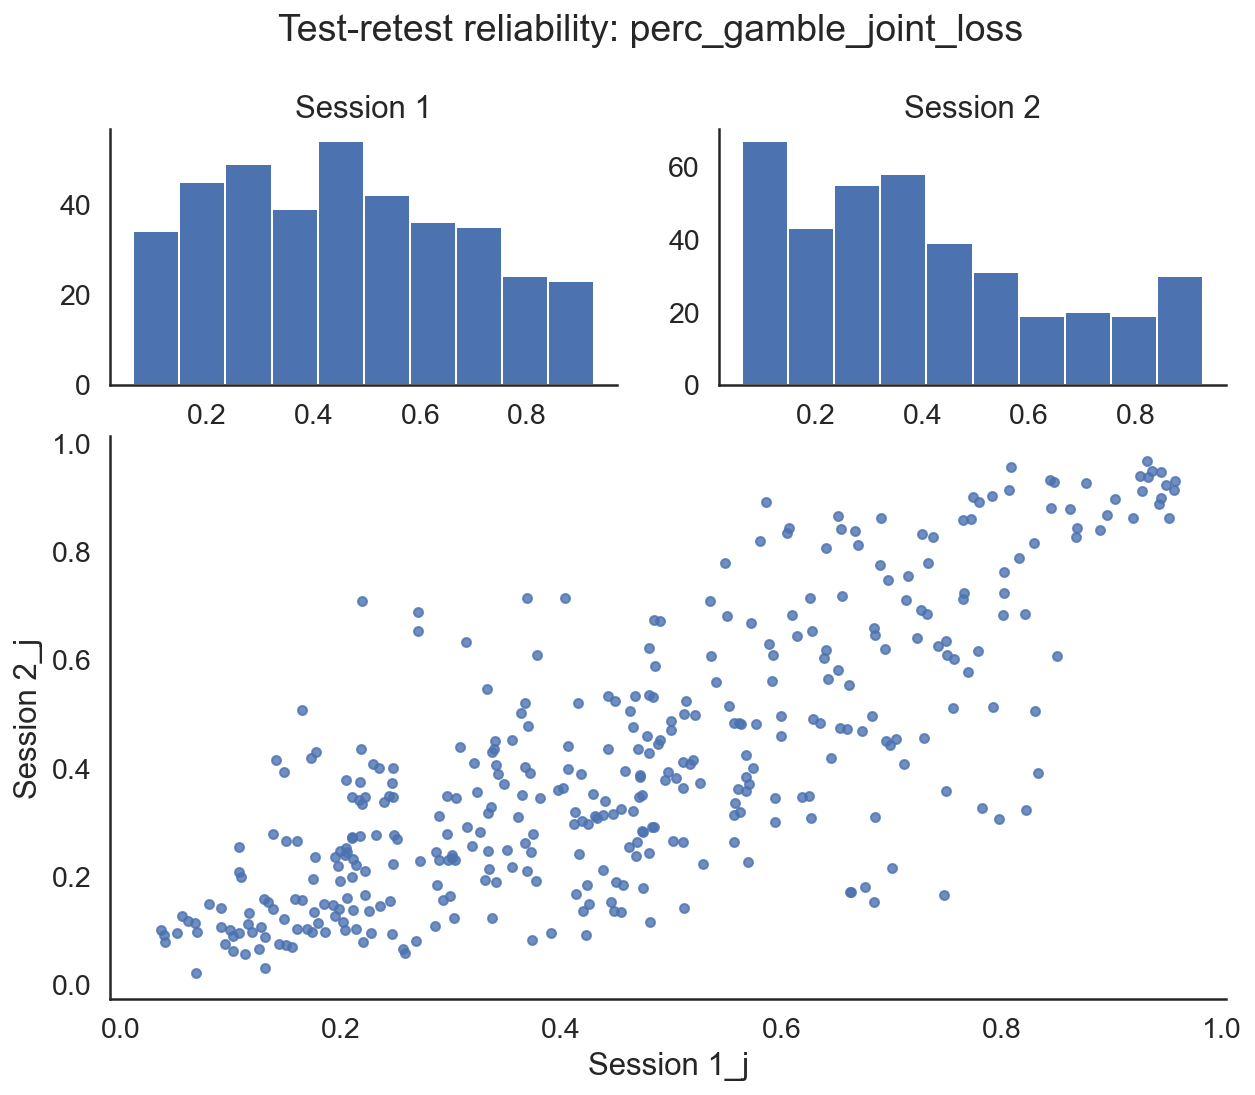

In [ ]:
iccs_trial_joint_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.822,10.256,380.0,381.0,0.0,0.793,0.848,".82 (.79, .85)"
Single_random_raters,ICC2,0.823,10.854,380.0,380.0,0.0,0.787,0.853,".82 (.79, .85)"
Single_fixed_raters,ICC3,0.831,10.854,380.0,380.0,0.0,0.803,0.856,".83 (.80, .86)"
Average_raters_absolute,ICC1k,0.902,10.256,380.0,381.0,0.0,0.885,0.918,".90 (.88, .92)"
Average_random_raters,ICC2k,0.903,10.854,380.0,380.0,0.0,0.881,0.921,".90 (.88, .92)"
Average_fixed_raters,ICC3k,0.908,10.854,380.0,380.0,0.0,0.891,0.922,".91 (.89, .92)"


,variance,Percent
ID,0.039,0.823
Items,0.000,0.010
Residual,0.008,0.167
Total,0.047,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


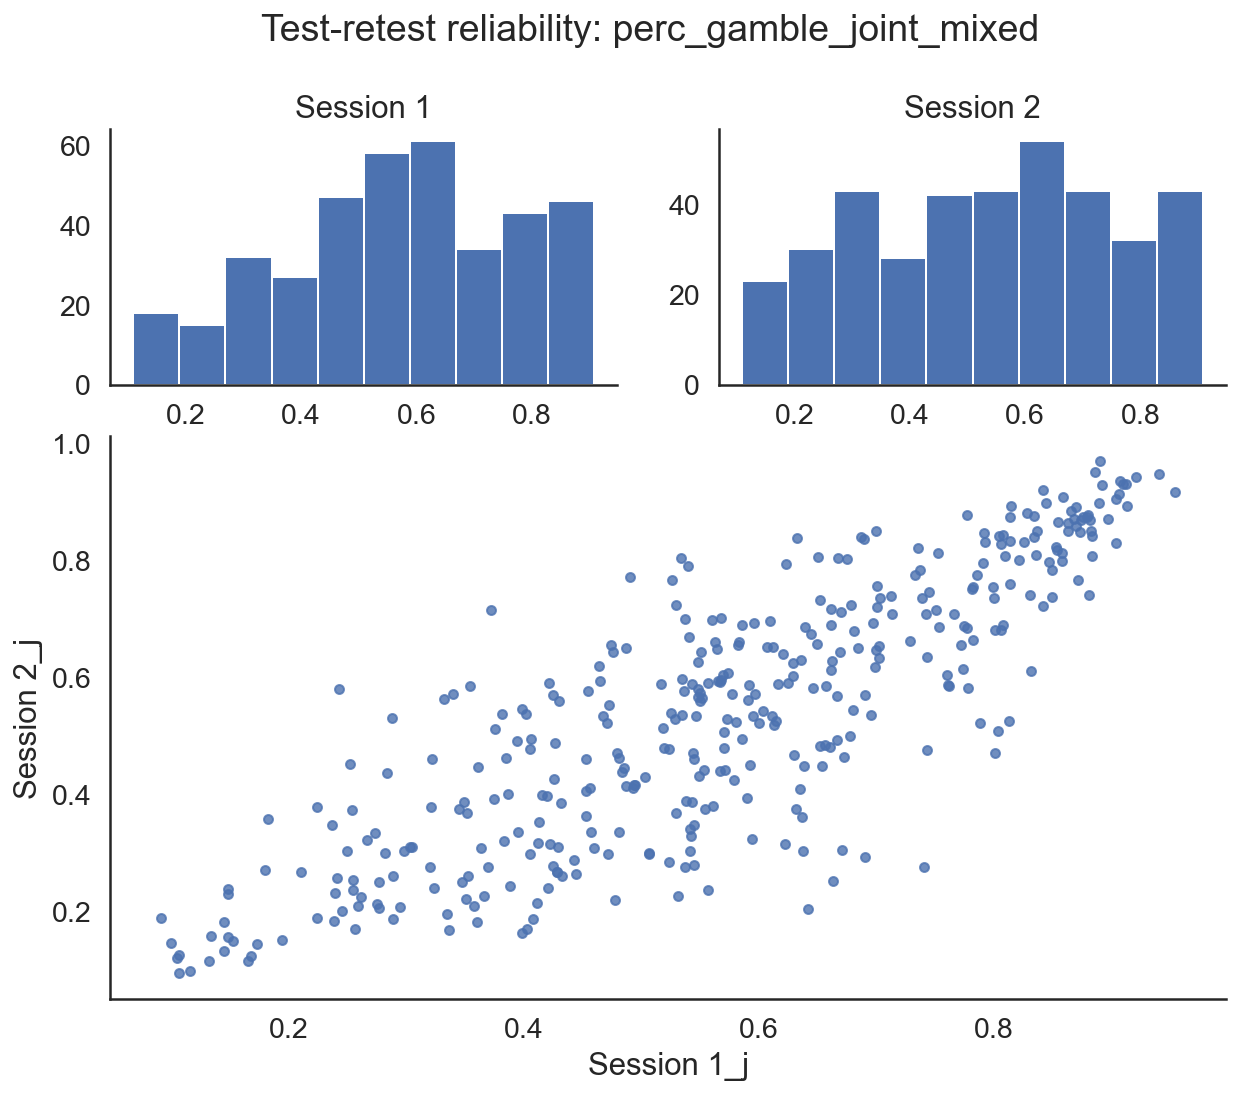

In [ ]:
iccs_trial_joint_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_mixed', add_jitter = True)

### Based on model-calculated variances

#### Win

In [ ]:
iccs_mod_win = stats.get_model_calculated_icc(ms['win'])
iccs_mod_win['icc']

R[write to console]: Lade nötiges Paket: insight



0.7918232439451038

#### Loss

In [ ]:
iccs_mod_loss = stats.get_model_calculated_icc(ms['loss'])
iccs_mod_loss['icc']

0.7020751843821343

#### Win

In [ ]:
iccs_mod_mixed = stats.get_model_calculated_icc(ms['mixed'])
iccs_mod_mixed['icc']

0.7243365017755401

## Comparison of methods

### All methods

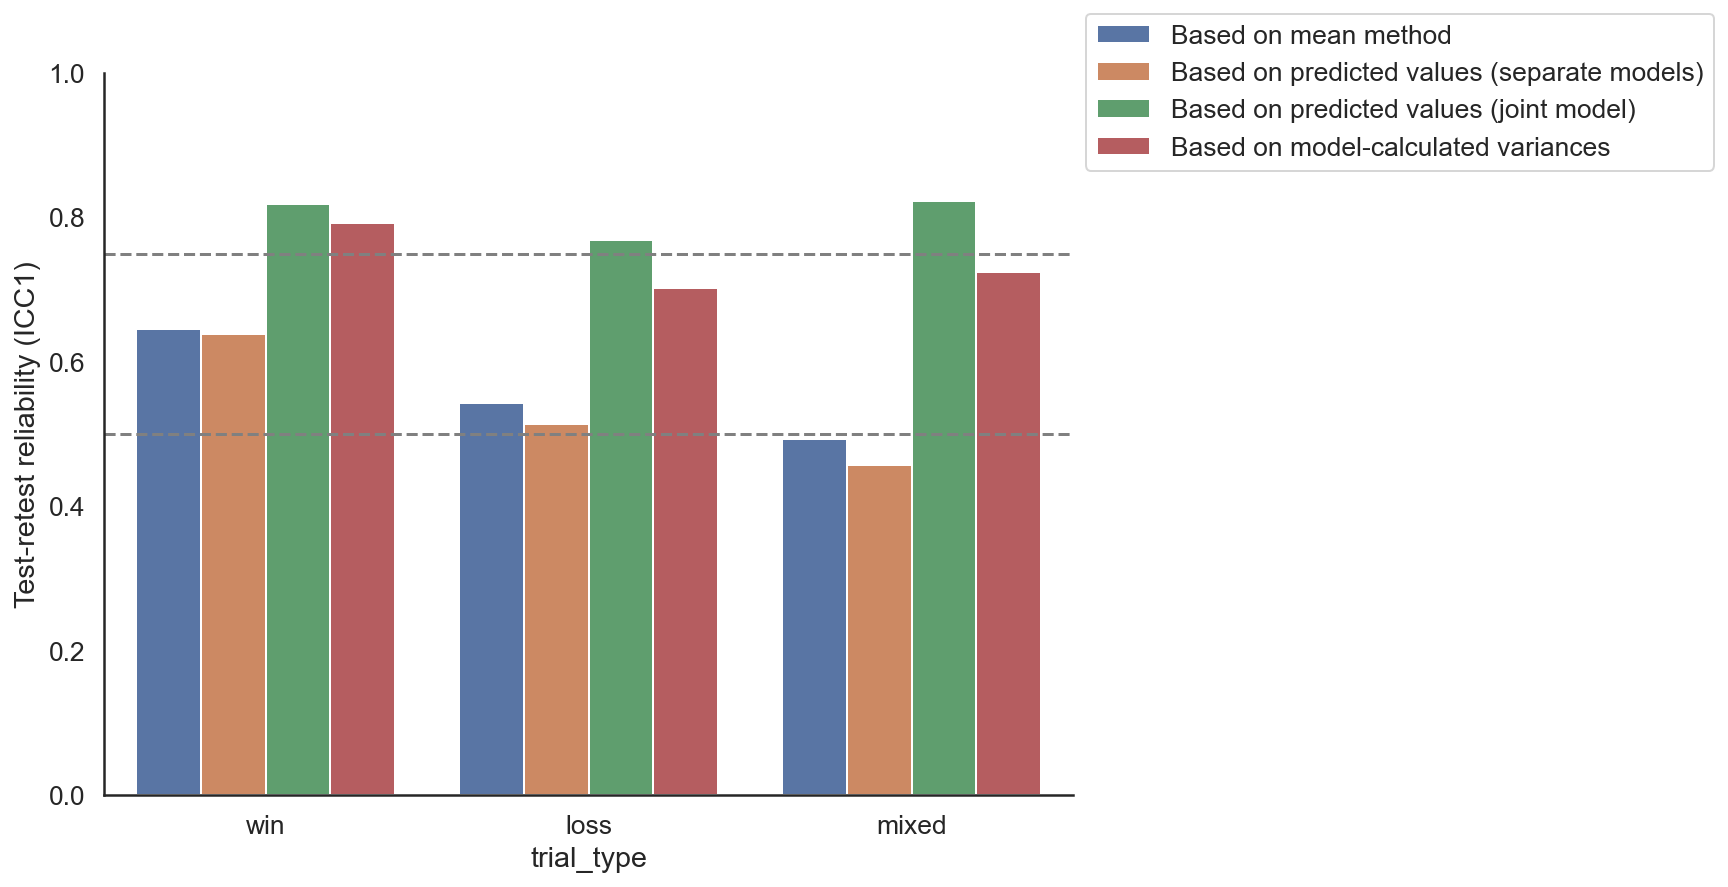

In [ ]:
iccs = {
    "Based on mean method_win": iccs_mean_win,
    "Based on mean method_loss": iccs_mean_loss,
    "Based on mean method_mixed": iccs_mean_mixed,
    "trial_sep_win": iccs_trial_sep_win,
    "trial_sep_loss": iccs_trial_sep_loss,
    "trial_sep_mixed": iccs_trial_sep_mixed,
    "trial_joint_win": iccs_trial_joint_win,
    "trial_joint_loss": iccs_trial_joint_loss,
    "trial_joint_mixed": iccs_trial_joint_mixed,
    "model_calc_win": iccs_mod_win,
    "model_calc_loss": iccs_mod_loss,
    "model_calc_mixed": iccs_mod_mixed
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

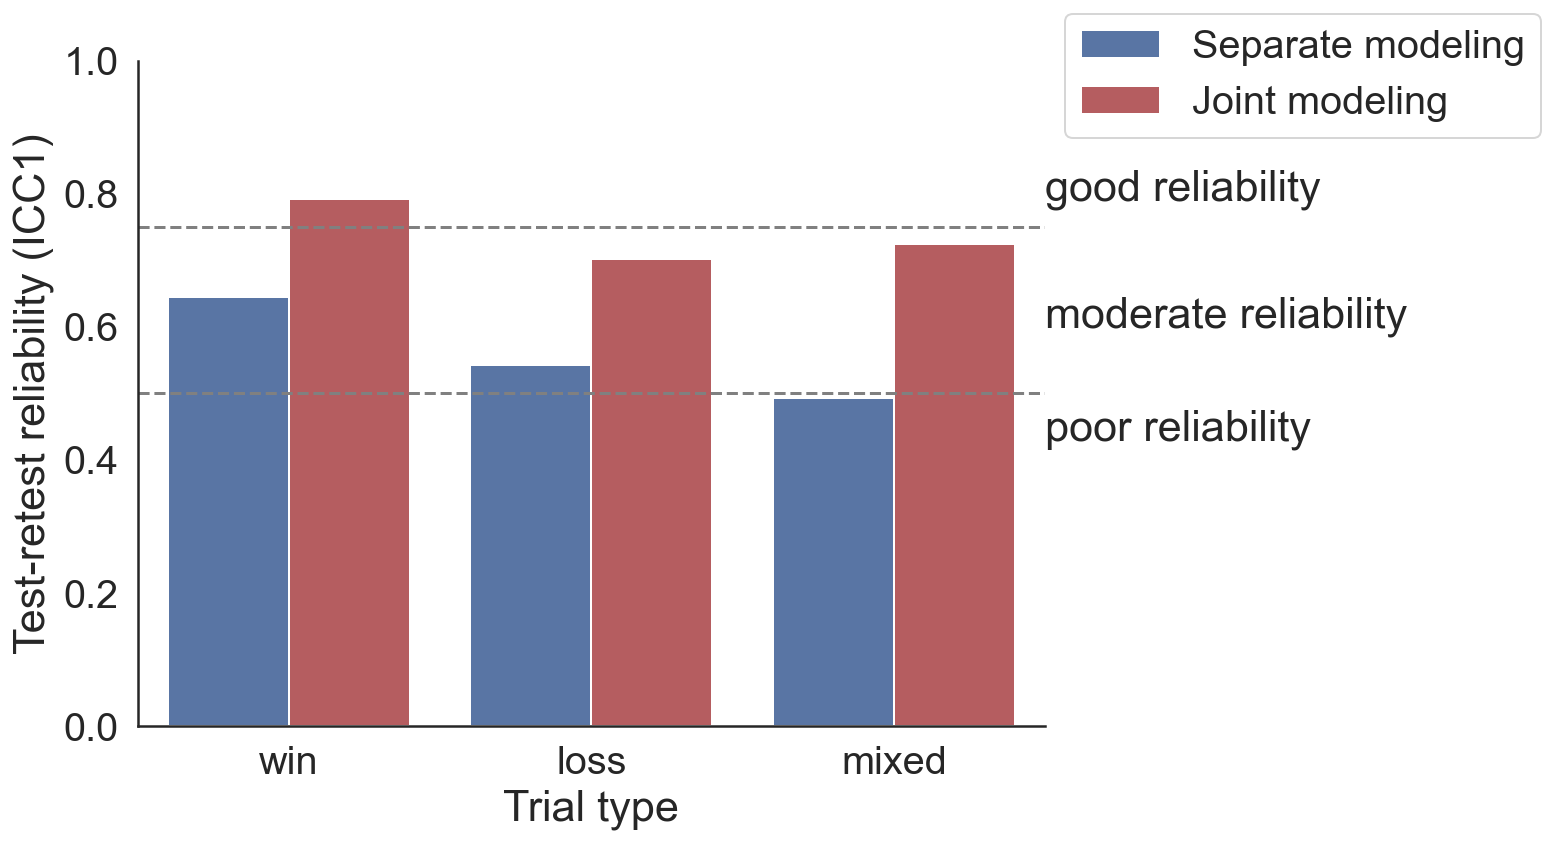

In [ ]:
iccs = {
    "Separate modeling_win": iccs_mean_win,
    "Separate modeling_loss": iccs_mean_loss,
    "Separate modeling_mixed": iccs_mean_mixed,
    "Joint modeling_win": iccs_mod_win,
    "Joint modeling_loss": iccs_mod_loss,
    "Joint modeling_mixed": iccs_mod_mixed
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 2.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Trial type');


## Variance proportions

### Win

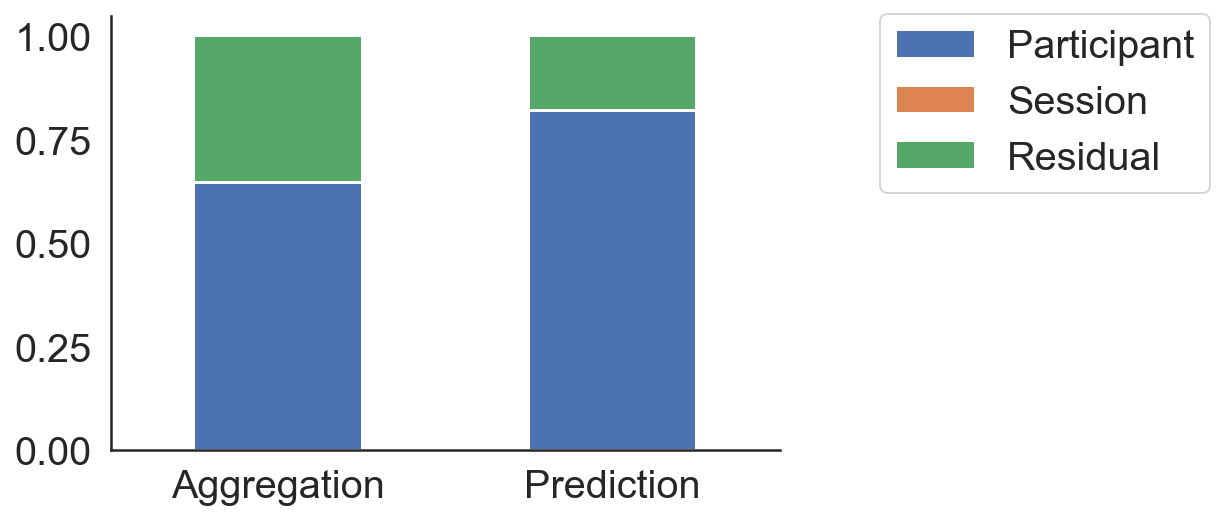

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
#ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.646046,0.003097,0.350857
Prediction,0.818966,0.001778,0.179256


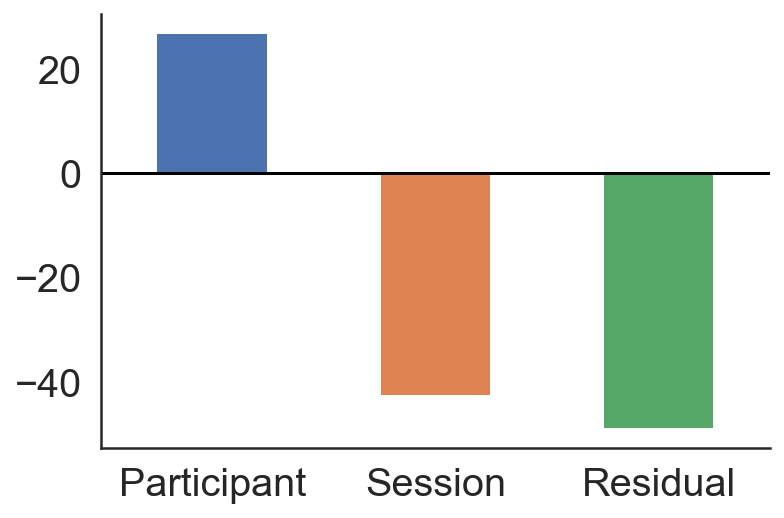

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax

ax = var_comp_plot_2({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
ax.get_legend().remove()

### Loss

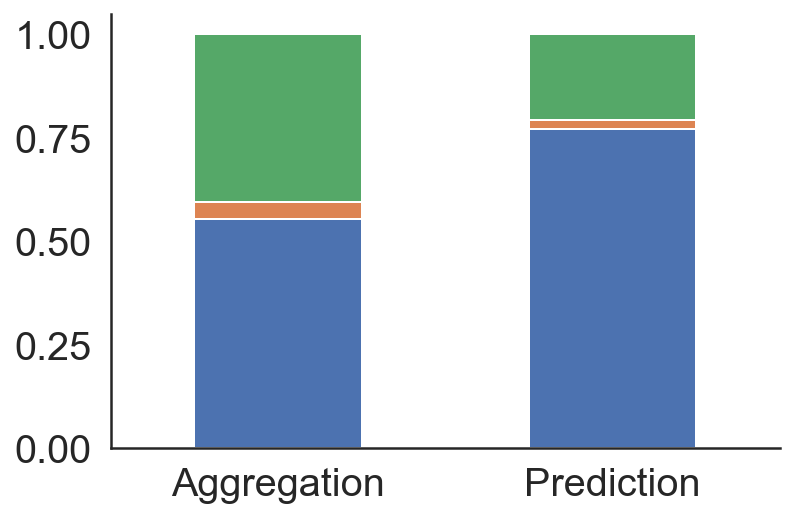

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.552776,0.042814,0.404410
Prediction,0.770861,0.021556,0.207583


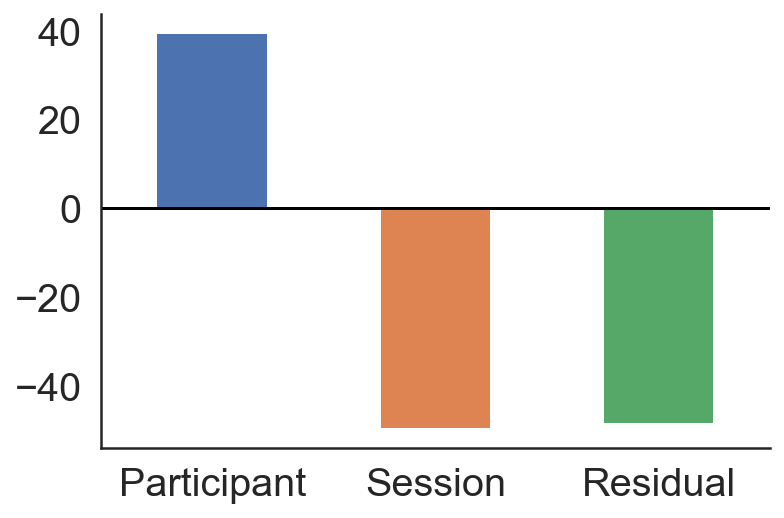

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

### Mixed

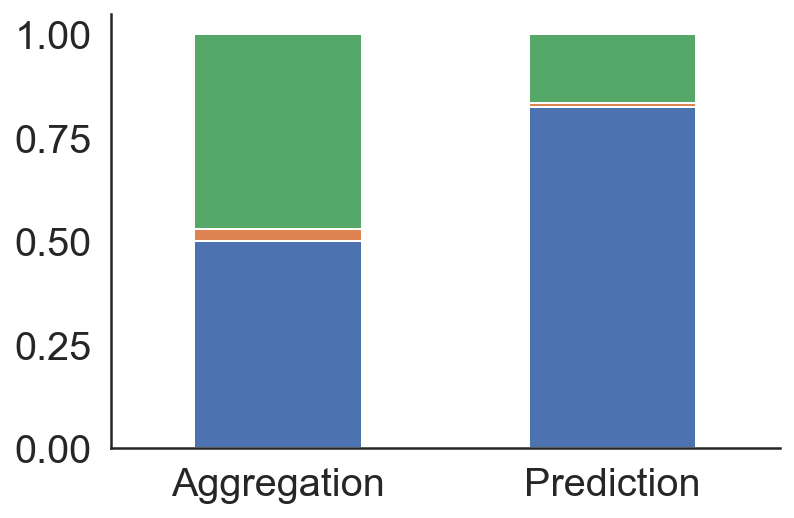

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.500119,0.028510,0.471371
Prediction,0.823183,0.009749,0.167068


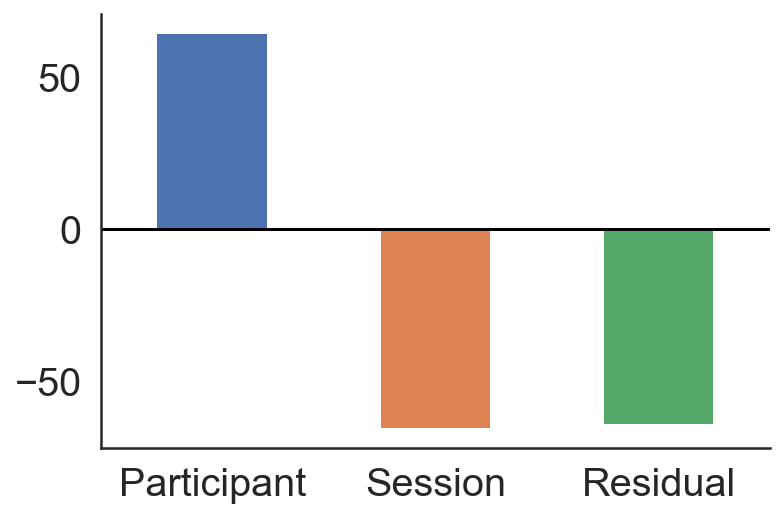

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

## Effect of time

In [ ]:
gbe = dp.get_gbe_data()

In [ ]:
scores = stats.get_scores(dp, dp.get_rtt_data, rtt_scoring.get_perc_gamble_predicted_joint)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



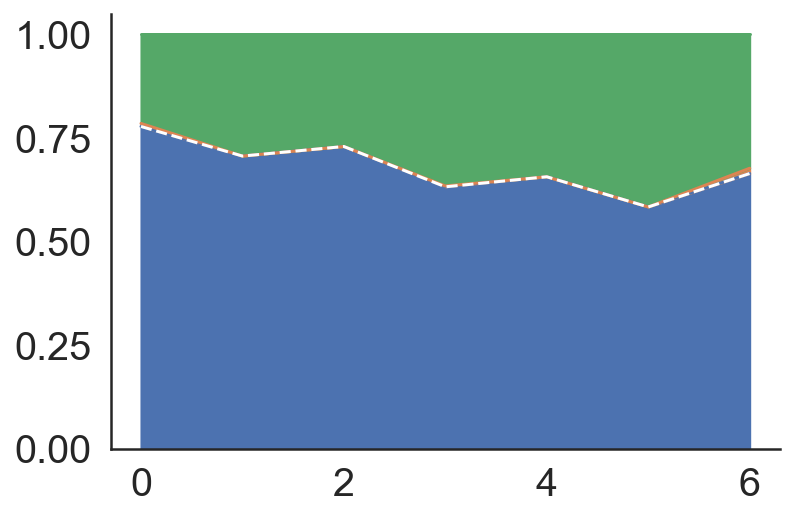

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_win")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



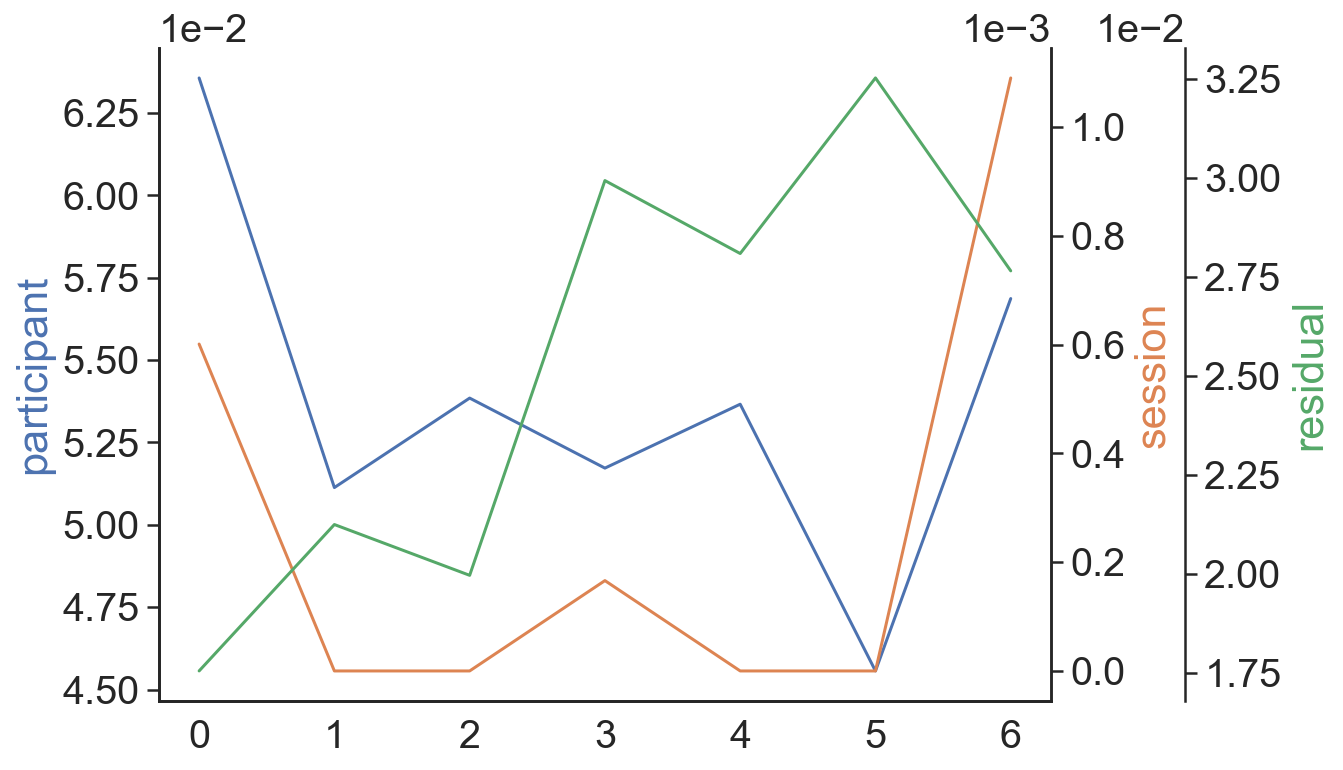

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



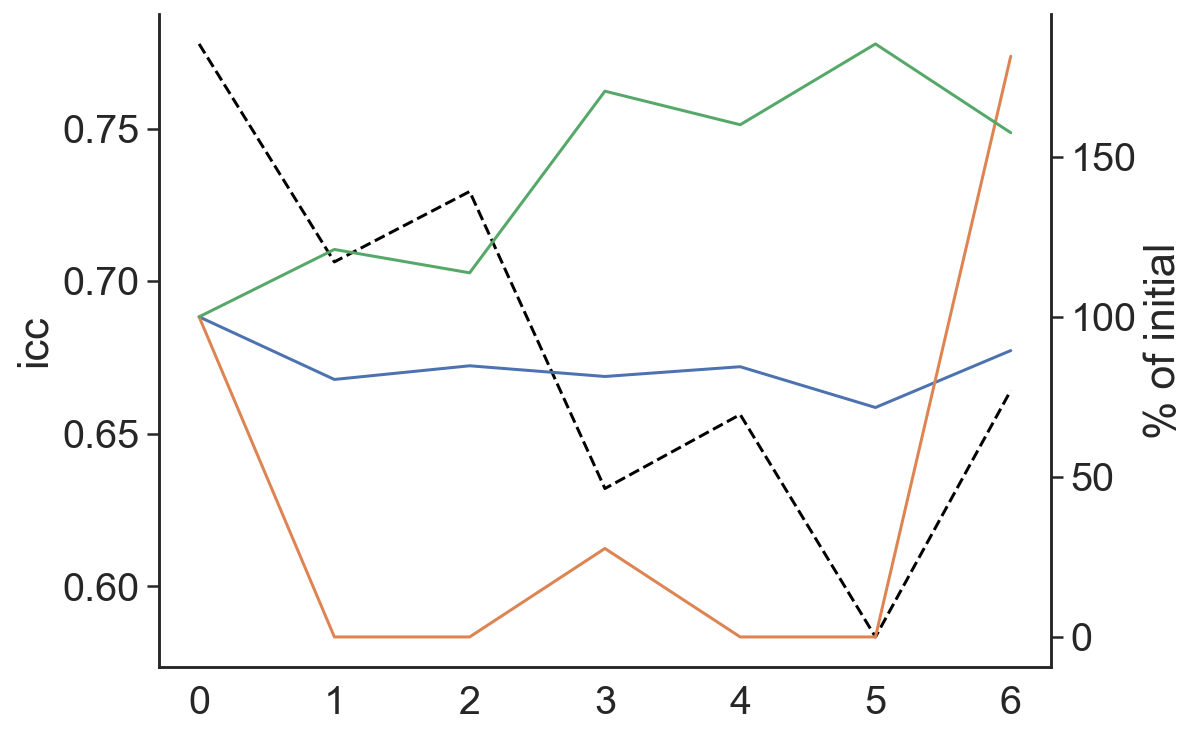

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



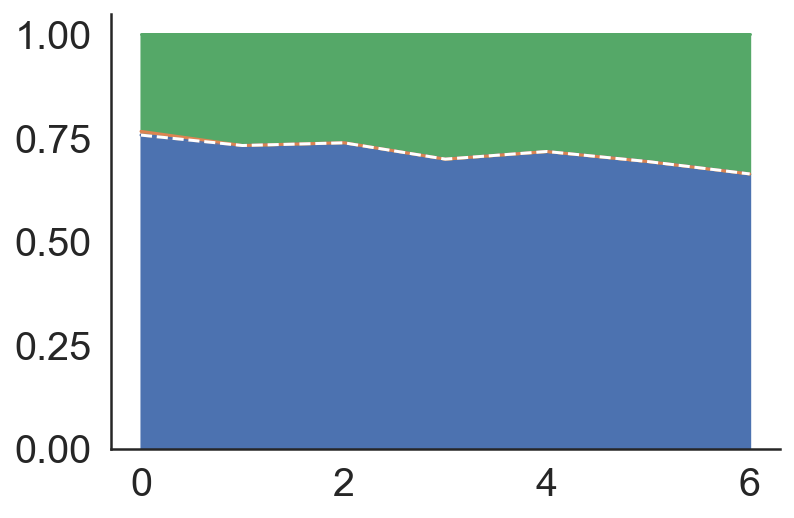

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_loss")

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



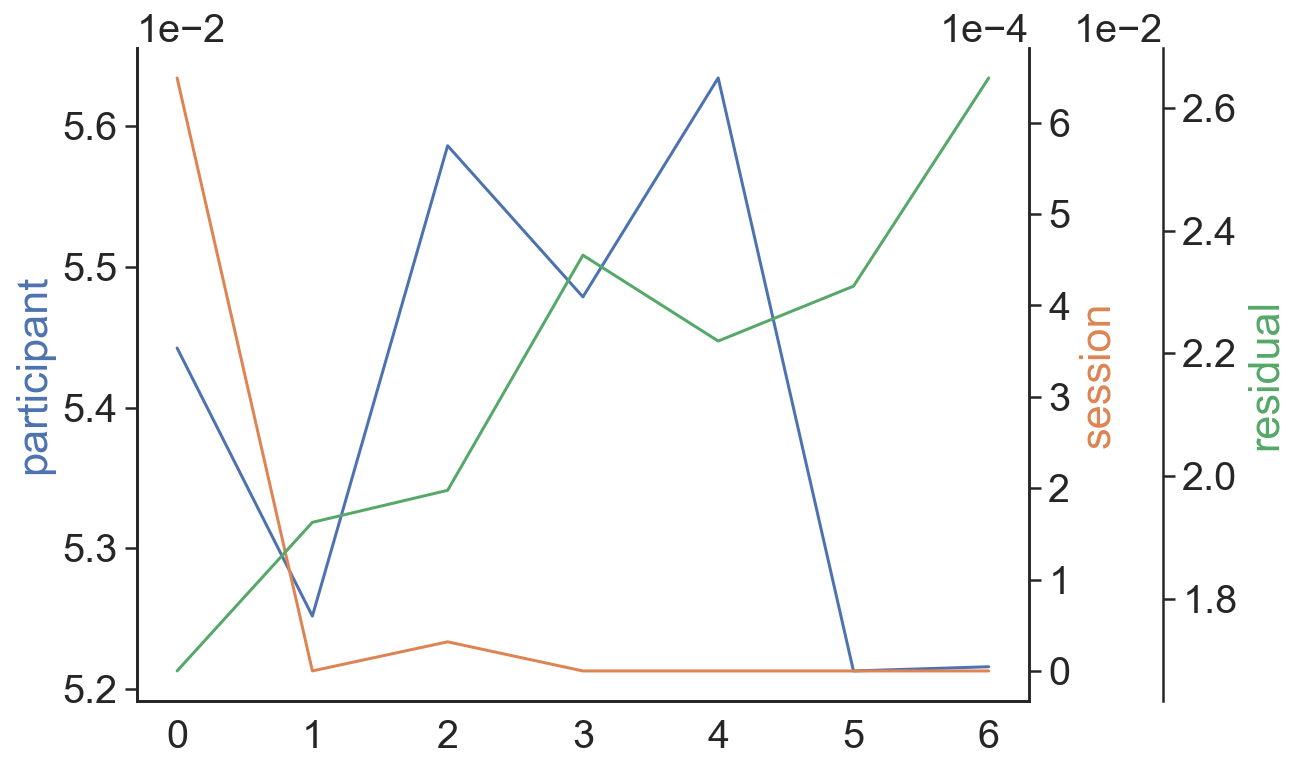

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



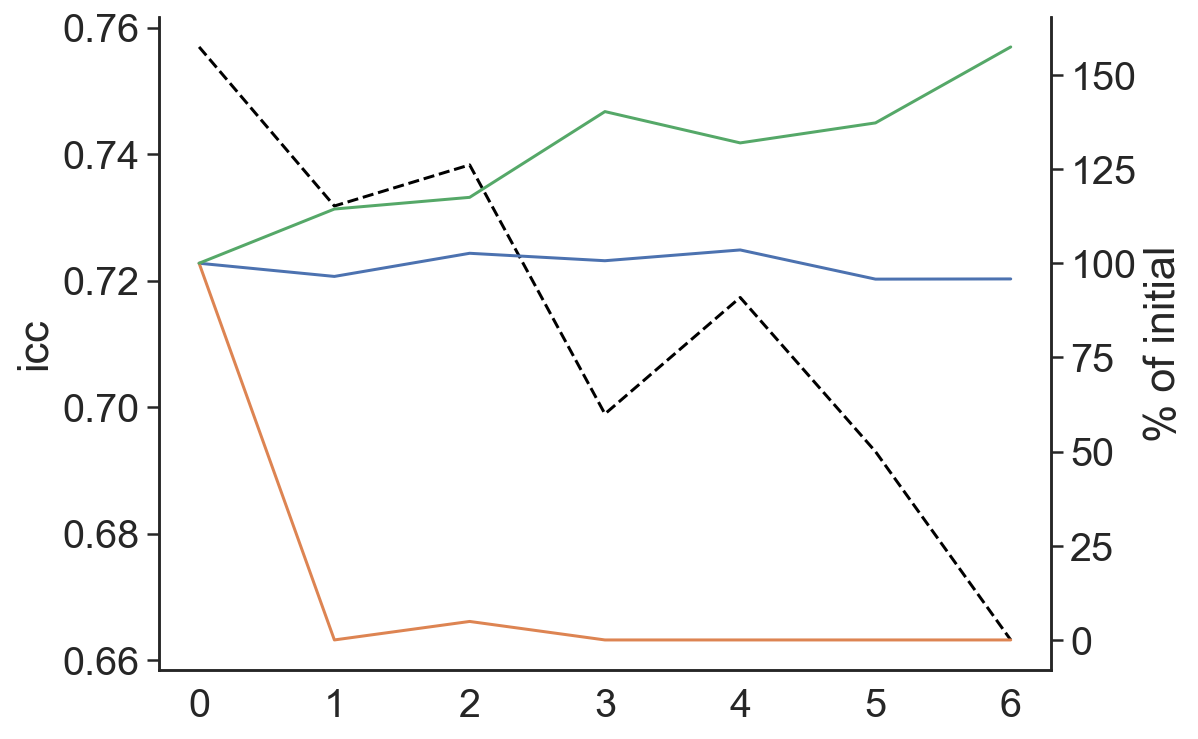

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



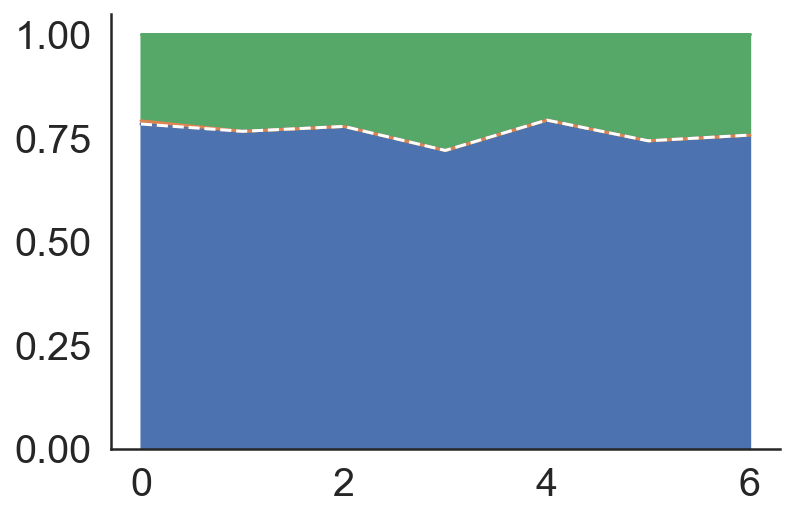

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_mixed")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



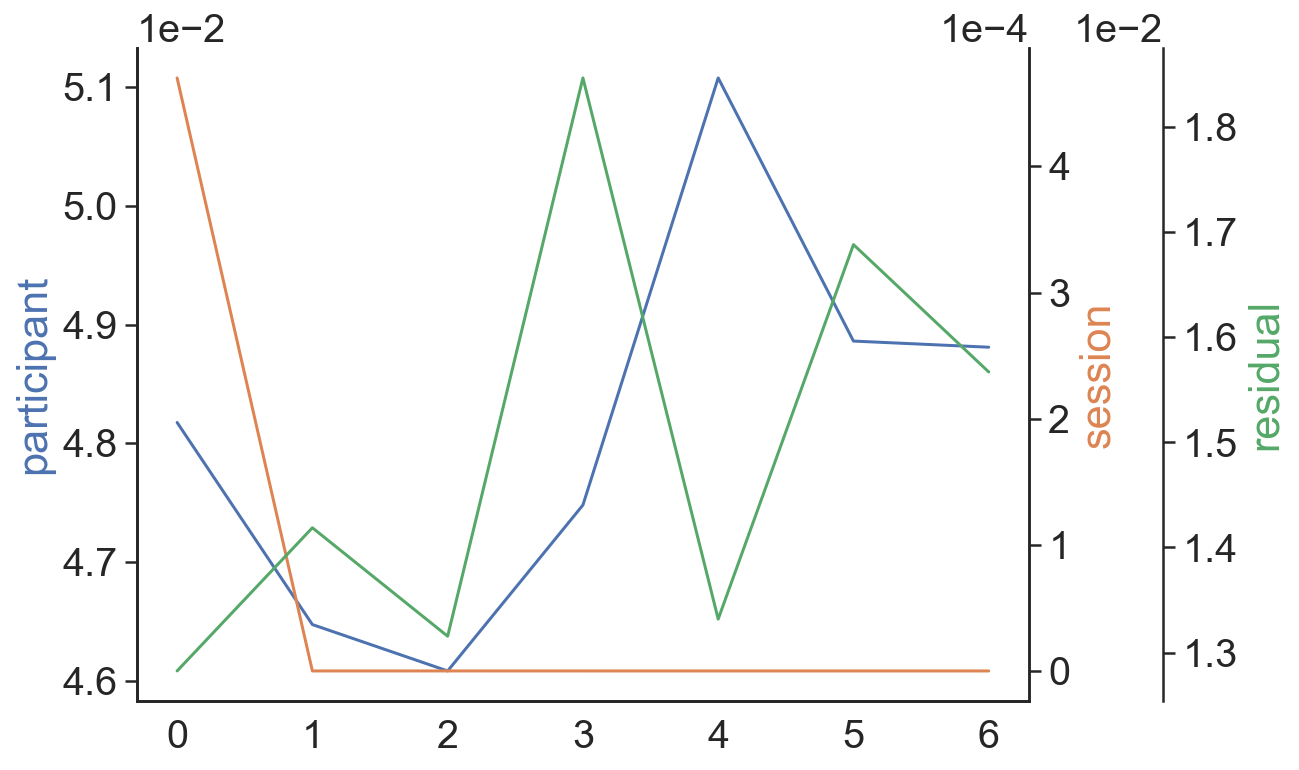

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



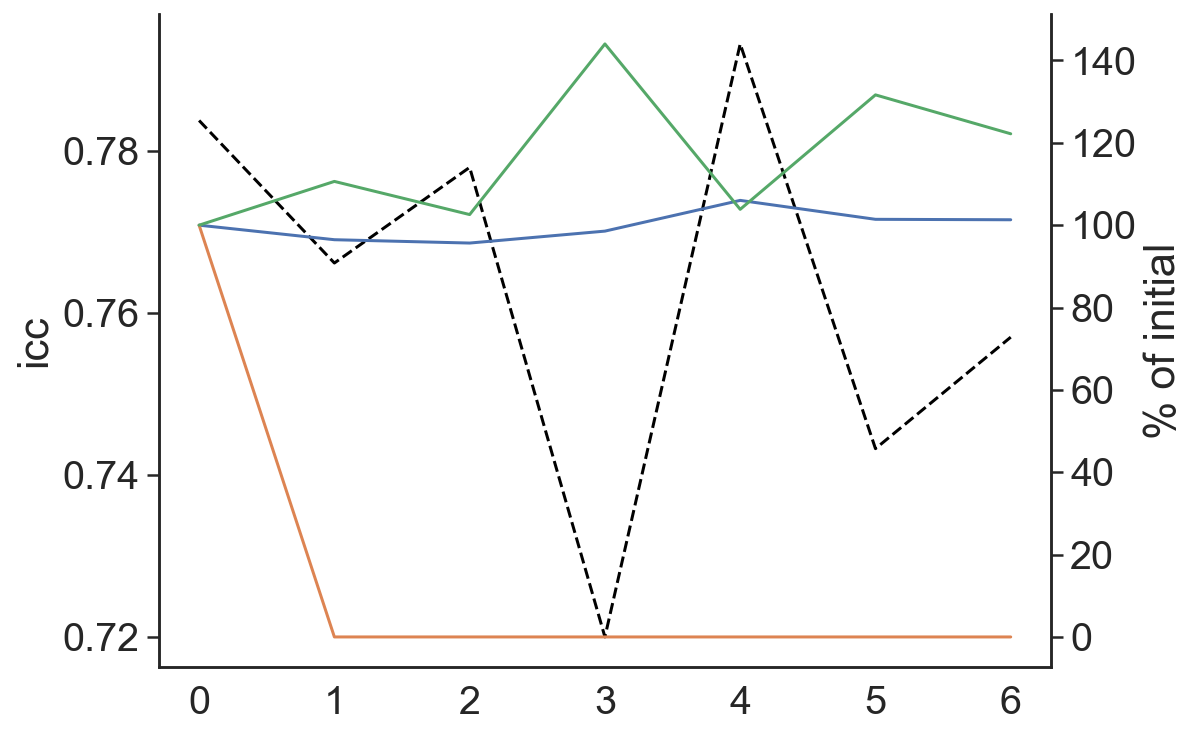

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

## Effect of time (percentage change)

In [ ]:


def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']


def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular



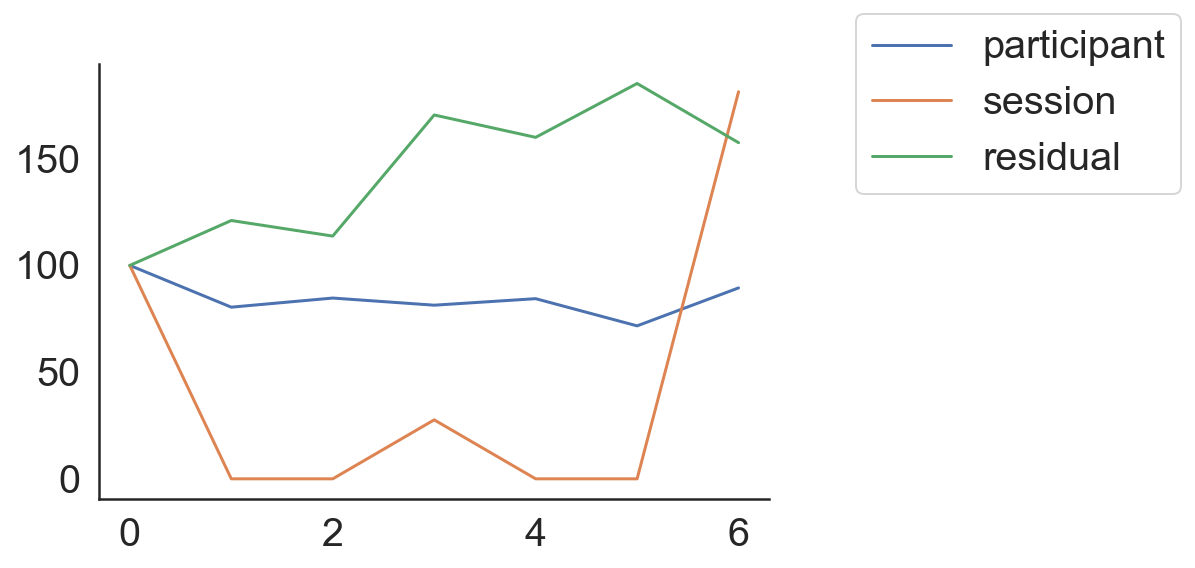

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



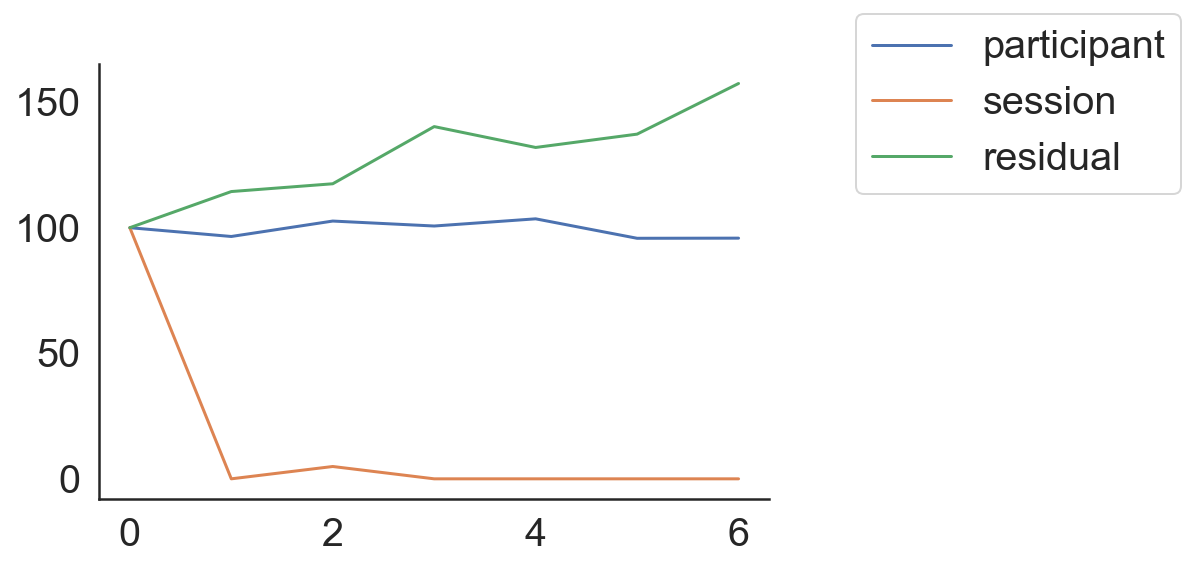

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



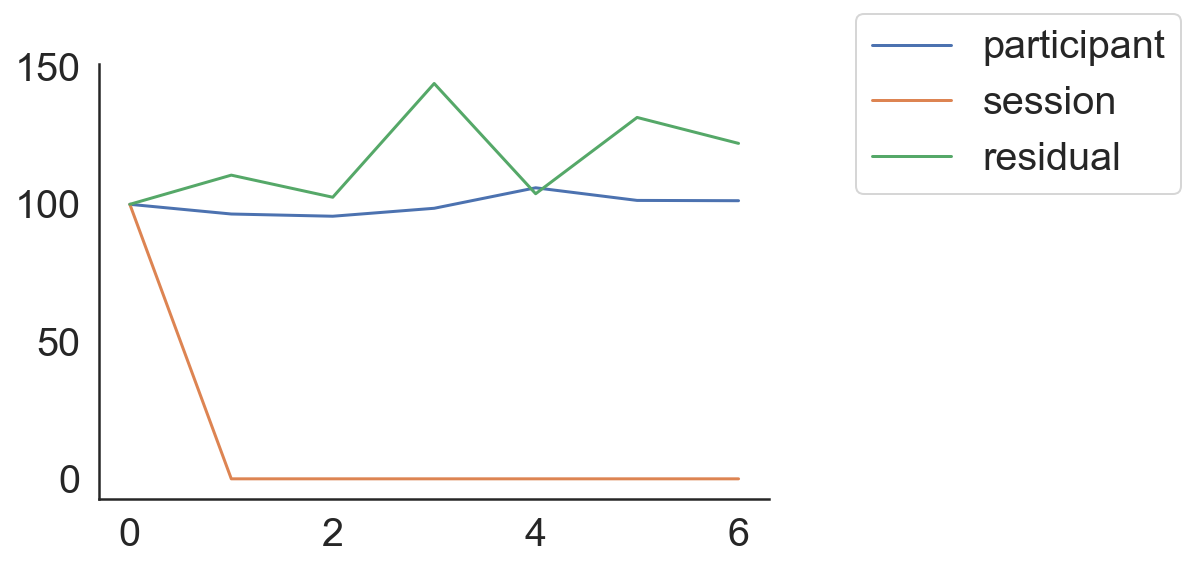

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



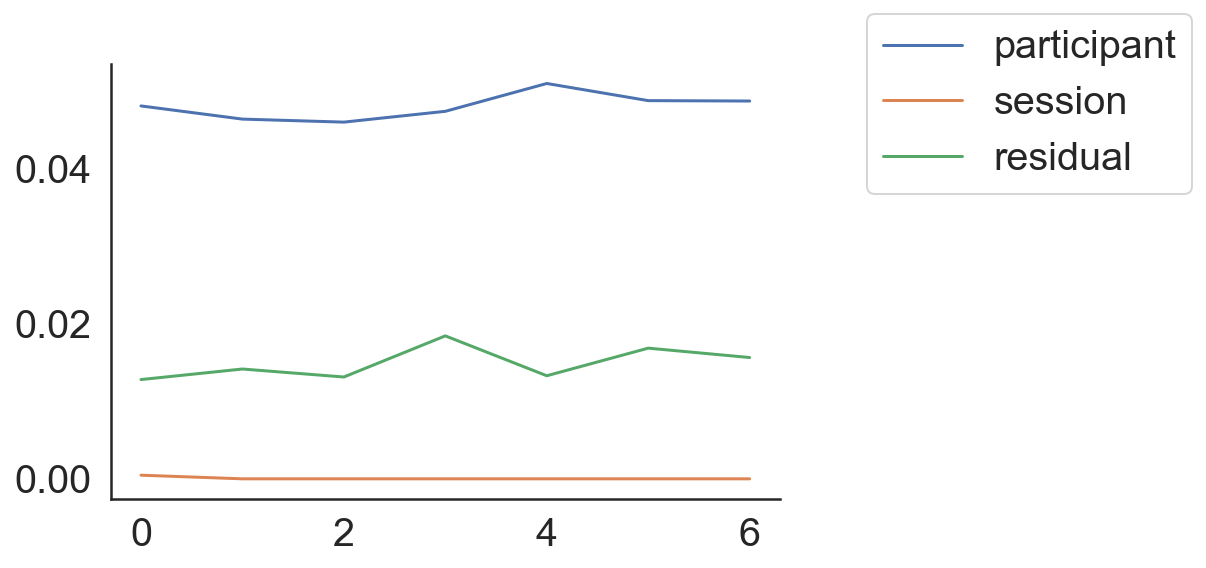

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)